## Model Training

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Load the dataset
data = pd.read_csv('bluetooth_data.csv')

# Split the data into features and labels
X = data.drop('label', axis=1)
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.90
Precision: 0.00
Recall: 0.00


C:\Users\joe-orion\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Real-time Detection Script

In [24]:
import time
import numpy as np

def simulate_real_time_data(num_samples=10):
    for _ in range(num_samples):
        sample = {
            'connection_duration': np.random.exponential(scale=10),
            'signal_strength': np.random.normal(loc=-50, scale=10),
            'data_transfer_rate': np.random.exponential(scale=5),
            'time_of_day': np.random.uniform(low=0, high=24)
        }
        yield sample
        time.sleep(1)  # Simulate real-time data stream

def classify_connection(model, scaler, sample):
    sample_df = pd.DataFrame([sample])
    sample_scaled = scaler.transform(sample_df)
    prediction = model.predict(sample_scaled)[0]
    return prediction

# Simulate real-time data and classify
for sample in simulate_real_time_data():
    prediction = classify_connection(model, scaler, sample)
    status = "Intrusion Detected!" if prediction == 1 else "Normal Connection"
    print(f"Data: {sample} => Status: {status}")

Data: {'connection_duration': 10.103432548770213, 'signal_strength': -54.0776812368327, 'data_transfer_rate': 30.46019602139307, 'time_of_day': 9.896185756067437} => Status: Normal Connection
Data: {'connection_duration': 3.5841905386719364, 'signal_strength': -47.72416931551717, 'data_transfer_rate': 3.7381589113968627, 'time_of_day': 14.405336665885521} => Status: Normal Connection
Data: {'connection_duration': 7.808291881373082, 'signal_strength': -45.7000092247858, 'data_transfer_rate': 4.4549040713011845, 'time_of_day': 16.06309815993694} => Status: Normal Connection
Data: {'connection_duration': 0.9609534057208788, 'signal_strength': -46.23862366419201, 'data_transfer_rate': 2.134361775883623, 'time_of_day': 0.3407025796394745} => Status: Normal Connection
Data: {'connection_duration': 5.748096311498291, 'signal_strength': -63.96537843085501, 'data_transfer_rate': 0.6101232221277295, 'time_of_day': 19.819397242971405} => Status: Normal Connection
Data: {'connection_duration': 22.

## Basic UI for Visualization
### Command-line Interface

1. Display Bluetooth Connections
2. Simulate Real-Time Detection
3. Exit
Enter your choice: 1


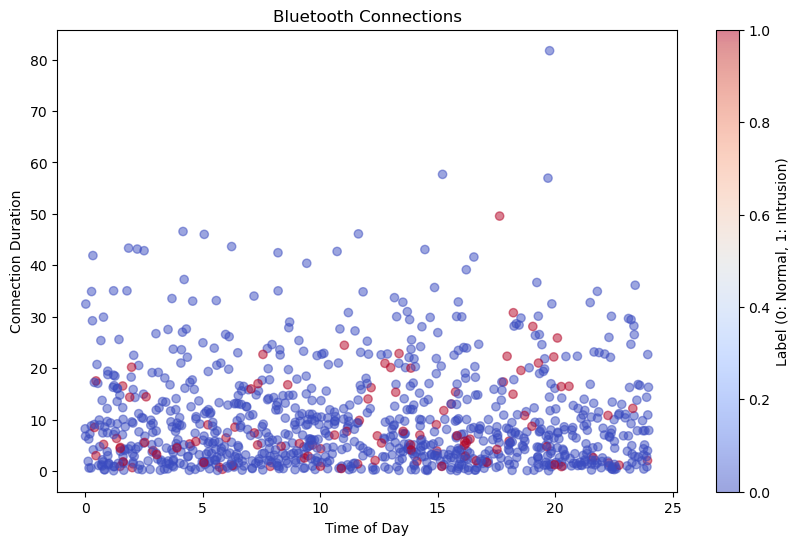

1. Display Bluetooth Connections
2. Simulate Real-Time Detection
3. Exit
Enter your choice: 3
Exiting...


SystemExit: 

C:\Users\joe-orion\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [22]:
import sys
import matplotlib.pyplot as plt

def plot_data(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['time_of_day'], data['connection_duration'], c=data['label'], cmap='coolwarm', alpha=0.5)
    plt.title('Bluetooth Connections')
    plt.xlabel('Time of Day')
    plt.ylabel('Connection Duration')
    plt.colorbar(label='Label (0: Normal, 1: Intrusion)')
    plt.show()

def main():
    while True:
        print("1. Display Bluetooth Connections")
        print("2. Simulate Real-Time Detection")
        print("3. Exit")
        choice = input("Enter your choice: ")
        
        if choice == '1':
            data = pd.read_csv('bluetooth_data.csv')
            plot_data(data)
        elif choice == '2':
            for sample in simulate_real_time_data():
                prediction = classify_connection(model, scaler, sample)
                status = "Intrusion Detected!" if prediction == 1 else "Normal Connection"
                print(f"Data: {sample} => Status: {status}")
        elif choice == '3':
            print("Exiting...")
            sys.exit()
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()


## Testing and Refinement

In [8]:
# Test scenarios
test_samples = [
    {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10},
    {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 22},
    {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 0, 'time_of_day': 15},
    {'connection_duration': 30, 'signal_strength': 30, 'data_transfer_rate': 15, 'time_of_day': 3}
]

for sample in test_samples:
    prediction = classify_connection(model, scaler, sample)
    status = "Intrusion Detected!" if prediction == 1 else "Normal Connection"
    print(f"Data: {sample} => Status: {status}")


Data: {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10} => Status: Normal Connection
Data: {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 22} => Status: Normal Connection
Data: {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 0, 'time_of_day': 15} => Status: Normal Connection
Data: {'connection_duration': 30, 'signal_strength': 30, 'data_transfer_rate': 15, 'time_of_day': 3} => Status: Normal Connection


In [9]:
data.head()

,connection_duration,signal_strength,data_transfer_rate,time_of_day,label
0,4.692681,-48.222990,17.794994,9.307826,0
1,30.101214,-63.353444,2.012450,19.284904,0
2,13.167457,-46.198021,3.289297,21.642577,0
3,9.129426,-43.894143,1.091388,4.883346,0
4,1.696249,-44.402096,4.718054,1.607367,0


In [10]:
data.tail()

,connection_duration,signal_strength,data_transfer_rate,time_of_day,label
995,0.960507,-63.200225,1.013288,17.624776,0
996,24.926998,-56.117691,9.654212,5.011942,0
997,1.471304,-50.370368,10.709133,1.405567,0
998,30.004907,-54.293022,3.139698,13.256787,0
999,5.906010,-56.924210,0.393591,14.285514,0


## More test samples

In [18]:
# Define a potentially suspicious test sample
intrusion_test_sample = {'connection_duration': 16, 'signal_strength': -25, 'data_transfer_rate':10.345420566187718 , 'time_of_day': 12}

# Test samples including the suspicious one
test_samples = [
    {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10},
    {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 22},
    {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 2, 'time_of_day': 15},
    {'connection_duration': 30, 'signal_strength': -30, 'data_transfer_rate': 15, 'time_of_day': 10},
    intrusion_test_sample  # Adding the suspicious sample to the test list
]

for sample in test_samples:
    prediction = classify_connection(model, scaler, sample)
    status = "Intrusion Detected!" if prediction == 1 else "Normal Connection"
    print(f"Data: {sample} => Status: {status}")


Data: {'connection_duration': 5, 'signal_strength': -60, 'data_transfer_rate': 3, 'time_of_day': 10} => Status: Normal Connection
Data: {'connection_duration': 20, 'signal_strength': -40, 'data_transfer_rate': 10, 'time_of_day': 22} => Status: Normal Connection
Data: {'connection_duration': 7, 'signal_strength': -55, 'data_transfer_rate': 2, 'time_of_day': 15} => Status: Normal Connection
Data: {'connection_duration': 30, 'signal_strength': -30, 'data_transfer_rate': 15, 'time_of_day': 10} => Status: Normal Connection
Data: {'connection_duration': 16, 'signal_strength': -25, 'data_transfer_rate': 10.345420566187718, 'time_of_day': 12} => Status: Normal Connection
